# 4.2
## 3.

### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import scikit_posthocs as sp

# Obter série de anos

In [2]:
years = pd.Series([i for i in range(1900, 2021)])

seed_value = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value)

# Ler os dados

In [3]:
dados_lidos = pd.read_csv("CO_data.csv")

# Obter dados dos anos pretendidos

In [4]:
# Definição das condições de filtragem.
condicao_anos = dados_lidos.year.isin(list(sampleyears2))

# Lista de cores.
cores = list(mcolors.BASE_COLORS.keys())[:5]
# Lista de paises
paises = ["United States", "Russia", "China", "India", "European Union (27)"]

dados_trabalho = {}

for pais in paises:
    condicao_pais = dados_lidos.country == pais
    dados_trabalho[pais] = dados_lidos.loc[condicao_anos & condicao_pais, ["year", "co2"]]

amostras = [dados_trabalho[pais]["co2"] for pais in dados_trabalho]

# Gráficos dos dados

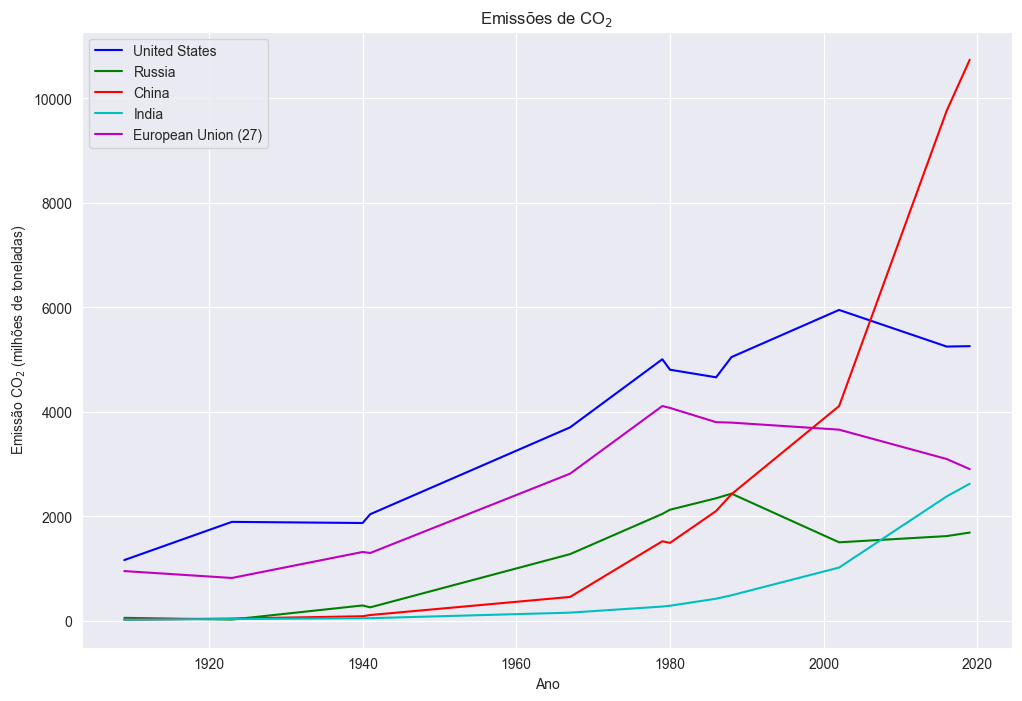

In [5]:
plot_fig, plot_ax = plt.subplots(figsize=(12, 8))

plot_ax.set_title(r"Emissões de CO$_2$")
plot_ax.set_xlabel("Ano")
plot_ax.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")

graficos = []

# Construir as várias "linhas"
for idx, pais in enumerate(paises):
    grafico = plot_ax.plot(
        "year",  # Seria a utilizar para o eixo dos XX.
        "co2",  # Seria a utilizar para o eixo dos YY.
        data=dados_trabalho[pais],  # Estrutura de dados a utilizar, neste caso 1 DataFrame. 
        color=cores[idx],  # Cor da "linha".
        label=pais,  # O valor "humano" das etiquetas. 
    )
    # Vou guardar as linhas numa lista caso queira mais tarde referênciar as mesmas.
    graficos.append(grafico)

plot_ax.legend(loc="upper left")

# Boxplot

C:\Users\paulo\AppData\Local\Temp\ipykernel_18756\1795682290.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


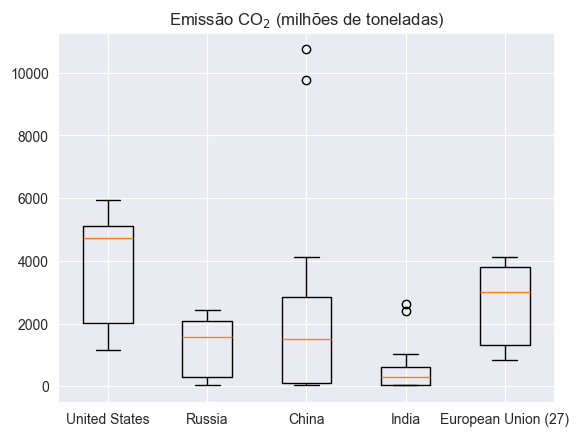

In [6]:
fig_bp, ax_bp = plt.subplots()
boxplot = ax_bp.boxplot(amostras, labels=paises)
ax_bp.set_title(r"Emissão CO$_2$ (milhões de toneladas)")
fig_bp.show()

# Não usar One-Way ANOVA

Não se verificam algumas das condições necessárias:
- Amostras pequenas (12 valores por país);
- A variável dependente (ano) não é continua;
- Condiçao 2 da página 34 do "TestesParametricosPT.pdf" não sei explicar; TODO: explicar
- As observações são relacionadas (mesmos anos);
- Existem *outliers significativos*, nas amostras da China e India;

Assim, considerámos que não se justifica sequer testar a distribuição normal e a homogeneidade das amostras.


# Teste escolhido

Kruskal-Wallis

Várias amostras (mais de 2) independentes (países diferentes);
A variável aleatória (emissão dde $CO_2$) é quantitativa;

$$H_0: A distribuição das emissões de CO_2 ao longo dos anos observados é igual$$
$$H_1: A distribuiçao das emissões de CO_2 ao longo dos anos observados não é igual$$

*scipy.stats.kruskal()*


In [13]:
resultado = stats.kruskal(*amostras)
print(f"Valor da estatistica: {resultado.statistic:.4}\np-value: {resultado.pvalue:.4e}")

Valor da estatistica: 21.48
p-value: 2.5464e-04


Como o valor de *p-value* é baixo (próximo de 0) rejeitamos a hipótese nula, ou seja as emissões são diferentes. 

# Teste Post Hoc

O teste *post hoc* que vamos usar é o 

In [14]:
sp.posthoc_conover(a=amostras)

,1,2,3,4,5
1,1.000000,0.000666,0.004564,0.000005,0.198390
2,0.000666,1.000000,0.517801,0.146809,0.024872
3,0.004564,0.517801,1.000000,0.038304,0.103492
4,0.000005,0.146809,0.038304,1.000000,0.000390
5,0.198390,0.024872,0.103492,0.000390,1.000000


In [15]:
sp.posthoc_dunn(a=amostras)

,1,2,3,4,5
1,1.000000,0.002878,0.014573,0.000027,0.282238
2,0.002878,1.000000,0.590816,0.224151,0.056759
3,0.014573,0.590816,1.000000,0.079565,0.171466
4,0.000027,0.224151,0.079565,1.000000,0.001804
5,0.282238,0.056759,0.171466,0.001804,1.000000


In [16]:
sp.posthoc_nemenyi(a=amostras)

,1,2,3,4,5
1,1.000000,0.064086,0.201600,0.001473,0.885242
2,0.064086,1.000000,0.990509,0.830603,0.458441
3,0.201600,0.990509,1.000000,0.545557,0.759639
4,0.001473,0.830603,0.545557,1.000000,0.045063
5,0.885242,0.458441,0.759639,0.045063,1.000000
